# Airbnb Hostings in London and Neighbourhood Crime 

### In this example notebook, we'll walk through the basics of exploring your data including: 
- importing data
- understanding data
- transforming data
- visualising data

First things first, we'll import the python libraries we'll need:

In [184]:
import pandas as pd             # data maniuplation
import numpy as np              # numerical libraries
import os                       # operating-system specifics
import matplotlib.pyplot as plt # plotting
import seaborn as sns           # fancy stylesheet over matplotlib
plt.style.use(['seaborn','dark_background'])

In [179]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

... and list the `.csv` files we have access to in the `Data` folder. The [os library](https://docs.python.org/3/library/os.html) allows you standardize the way you go through your file directory so it won't matter if you're on a mac or a PC.

In [2]:
path = os.path.join("../Data")
[f for f in os.listdir(path) if f.endswith(".csv")]

['Calendar.csv', 'Hosts.csv', 'HousePrices.csv', 'Listings.csv', 'Reviews.csv']

## Getting to grips with the data

To get a feel for what's in a dataframe, use the `head()` function, e.g.

In [342]:
listings = pd.read_csv(os.path.join(path,"Listings.csv"))
housePrices = pd.read_csv(os.path.join(path,"HousePrices.csv"))
hosts = pd.read_csv(os.path.join(path,"Hosts.csv"))
calendar = pd.read_csv(os.path.join(path,"Calendar.csv"))
reviews = pd.read_csv(os.path.join(path,"Reviews.csv"))

In [343]:
print('Listings Shape :', listings.shape)
print('housePrices :', housePrices.shape)
print('hosts :', hosts.shape)
print('calendar:', calendar.shape)
print('reviews :', reviews.shape) 

Listings Shape : (103546, 36)
housePrices : (891, 14)
hosts : (63544, 13)
calendar: (1853374, 6)
reviews : (617805, 6)


To get some summary statistics about each of the columns in the dataframe, use the `describe()` function.

In [344]:
listings.describe()

,id,host id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minNights,maxNights,reviewCount,review rating,review accuracy,review cleanliness,review checkin,review communication,review location,review value,guests included
count,1.035460e+05,1.035460e+05,103546.000000,103546.000000,103546.000000,103332.000000,103480.000000,103376.000000,103546.000000,1.035460e+05,103546.000000,73882.000000,73785.000000,73813.000000,73698.000000,73787.000000,73690.000000,73684.000000,103546.000000
mean,1.860240e+07,6.811356e+07,51.509675,-0.127843,3.180557,1.286523,1.397198,1.747688,3.758272,5.834671e+04,14.560823,92.270864,9.471871,9.239064,9.602092,9.638961,9.461759,9.246458,1.553290
std,8.733189e+06,6.732846e+07,0.045636,0.091573,2.002515,0.601339,0.915355,1.260421,13.606510,1.007425e+07,31.232065,10.454360,1.017013,1.168182,0.932985,0.911308,0.875098,1.055188,1.270976
min,9.554000e+03,5.160000e+02,51.289812,-0.509800,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,1.251873e+07,1.310693e+07,51.486150,-0.187520,2.000000,1.000000,1.000000,1.000000,1.000000,3.100000e+01,0.000000,90.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,1.000000
50%,1.993665e+07,4.016090e+07,51.513804,-0.125415,2.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,3.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000
75%,2.484513e+07,1.162400e+08,51.536790,-0.070150,4.000000,1.500000,2.000000,2.000000,3.000000,1.125000e+03,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000
max,3.288463e+07,2.473889e+08,51.686817,0.317520,16.000000,17.000000,44.000000,23.000000,1125.000000,2.147484e+09,614.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,24.000000


In [345]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103546 entries, 0 to 103545
Data columns (total 36 columns):
id                          103546 non-null int64
last scraped                103546 non-null object
listing url                 103546 non-null object
name                        103508 non-null object
host id                     103546 non-null int64
experiences                 103546 non-null object
neighbourhood               103546 non-null object
latitude                    103546 non-null float64
longitude                   103546 non-null float64
property type               103546 non-null object
room type                   103546 non-null object
accommodates                103546 non-null int64
bathrooms                   103332 non-null float64
bedrooms                    103480 non-null float64
beds                        103376 non-null float64
bed type                    103546 non-null object
minNights                   103546 non-null int64
maxNights            

A common pitfall when first using `pandas` arises from the column typings. Python is a dynamically-typed language, which means you often don't explictly see the type of a variable you are working with. Note that it is still strongly-typed though:

Although the types aren't specified by the user, they are inferred by the language runtime and their behaviour is dictated accordingly. Contrast this to dynamic and *weakly-typed* languages like javascript, which will happily allow the addition of numbers and strings.

To get the data types (`dtypes`) of your columns, use the `dtypes` property of a dataframe:

In [7]:
listings.dtypes

id                            int64
last scraped                 object
listing url                  object
name                         object
host id                       int64
experiences                  object
neighbourhood                object
latitude                    float64
longitude                   float64
property type                object
room type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed type                     object
minNights                     int64
maxNights                     int64
reviewCount                   int64
instant bookable             object
is business travel ready     object
cancellation policy          object
first review                 object
last review                  object
review rating               float64
review accuracy             float64
review cleanliness          float64
review checkin              

You can read more about `dtypes` [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes), the main thing to note is that `object` is potentially bad. Pandas uses `object` for string columns, which is fine for columns like `name`, but bad for columns which we expect to have stricter types, like the datetime columns `last scraped`, `first review` etc.

In this case, we need to explicitly tell pandas that these columns represent dates:

In [346]:
# Preparing data format 
listings['last scraped'] = pd.to_datetime(listings['last scraped'])
listings['first review'] = pd.to_datetime(listings['first review'])
listings['last review']  = pd.to_datetime(listings['last review'])

Object `pd.astype` not found.


In [347]:
# Prep data objects.
# All prices came in string form we have to seperate the dollar sign from the digits, we do this so that we can perform calculations with the  digits.
# Columns with price/ currency
# Price
# Cleaning fee
# Deposit fee

listings['price'] =listings['price'].str.replace('[$,]',"").astype(float)
listings['cleaning_fee'] = listings['cleaning fee'].str.replace('$',"").astype(float)
listings['security deposit'] = listings['security deposit'].str.replace('[$,]',"").astype(float)

In [348]:
listings.columns

Index(['id', 'last scraped', 'listing url', 'name', 'host id', 'experiences',
       'neighbourhood', 'latitude', 'longitude', 'property type', 'room type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed type',
       'minNights', 'maxNights', 'reviewCount', 'instant bookable',
       'is business travel ready', 'cancellation policy', 'first review',
       'last review', 'review rating', 'review accuracy', 'review cleanliness',
       'review checkin', 'review communication', 'review location',
       'review value', 'price', 'security deposit', 'cleaning fee',
       'guests included', 'extra people', 'cleaning_fee'],
      dtype='object')

In [349]:
 listings = listings.drop(columns = [ 'cleaning fee'])

In [350]:
Tempdf = listings[['id','last scraped', 'first review', 'last review']]
Tempdf.head()

,id,last scraped,first review,last review
0,9554,2018-04-08,2012-04-26,2018-02-04
1,11076,2018-04-08,2016-04-05,2016-11-23
2,11417,2018-04-08,2016-07-06,2018-01-31
3,13913,2019-03-08,2010-08-18,2018-06-17
4,15400,2019-03-08,2009-12-21,2018-03-30


In [351]:
listings.dtypes

id                                   int64
last scraped                datetime64[ns]
listing url                         object
name                                object
host id                              int64
experiences                         object
neighbourhood                       object
latitude                           float64
longitude                          float64
property type                       object
room type                           object
accommodates                         int64
bathrooms                          float64
bedrooms                           float64
beds                               float64
bed type                            object
minNights                            int64
maxNights                            int64
reviewCount                          int64
instant bookable                    object
is business travel ready            object
cancellation policy                 object
first review                datetime64[ns]
last review

Typings are one place where the data can act like you don't expect, another part of the cleaning process is checking for null values.

Pandas provides a function `isnull()`, which creates a new dataframe full of `True / False` if each cell is null or not, e.g.

In [353]:
#check for nulls 

Taking the sum of these columns (where `True == 1` and `False == 0`) gives us the total number of null values in each column:

In [354]:
# Percent null values
listings.isnull().sum() / len(listings) * 100

id                           0.000000
last scraped                 0.000000
listing url                  0.000000
name                         0.036699
host id                      0.000000
experiences                  0.000000
neighbourhood                0.000000
latitude                     0.000000
longitude                    0.000000
property type                0.000000
room type                    0.000000
accommodates                 0.000000
bathrooms                    0.206671
bedrooms                     0.063740
beds                         0.164178
bed type                     0.000000
minNights                    0.000000
maxNights                    0.000000
reviewCount                  0.000000
instant bookable             0.000000
is business travel ready     0.000000
cancellation policy          0.000000
first review                26.504162
last review                 26.486779
review rating               28.648137
review accuracy             28.741815
review clean

## OK - let's try some more interesting questions...

### 1. How many listings are there per neighbourhood?

In the first line we group all listings by their neighbourhood, then count how many unique `id`s are in each and divide by the number of listings.
In the second line we sort the listings and create a bar plot.

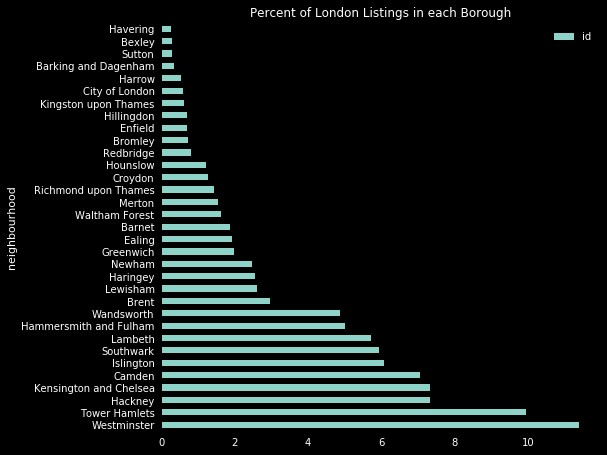

In [355]:
byNeighbourhood = listings.groupby('neighbourhood').agg({ 'id': len }) / len(listings) * 100
byNeighbourhood.sort_values(by = 'id', ascending = False).plot(kind = 'barh', figsize=(7,7))
plt.title("Percent of London Listings in each Borough")
plt.grid(False)
plt.show()

### How has the overall number of listings in London changed over time

Since we don't have the actual date the listing was first put up, we can use "first review" as a proxy for when it first showed up.

In [357]:
#listings['price_$']
#~~listings.price

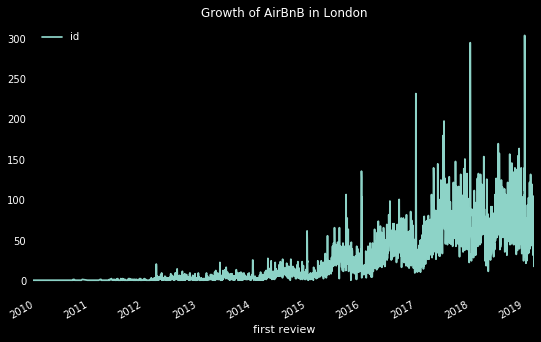

In [365]:
listings.groupby([listings['first review']]).agg({ 'id': len }).plot()
plt.title("Growth of AirBnB in London")
plt.grid()
plt.show()

In [417]:
listings.price.

114.25777915129508

## Challenge: Which neighbourhood has experienced the highest YoY growth from 2018-2019?

In [407]:

#listings.groupby('neighbourhood').agg({''})
#listings['pct'] = listings.sort_values('first review').groupby(['neighbourhood']).transform(lambda x: x.pct_change())

#### House price distribution accross London 

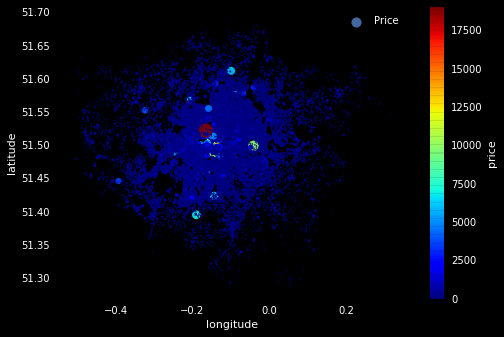

In [415]:
listings.plot(kind='scatter', x= 'longitude', y= 'latitude', alpha=0.9,
            s=listings['price']/100, label='Price',c='price',cmap=plt.get_cmap('jet'), colorbar=True, figsize=(7,5))
plt.grid(False)
plt.legend()

In [ ]:
interested = listings[['neighbourhood', '' ]]

In [362]:
listings[ listings['first review'].dt.year >= 2018].head()

,id,last scraped,listing url,name,host id,experiences,neighbourhood,latitude,longitude,property type,...,review cleanliness,review checkin,review communication,review location,review value,price,security deposit,guests included,extra people,cleaning_fee
70,55402,2019-03-07,https://www.airbnb.com/rooms/55402,"Modern 2 Bed 2 Bath, UK, Croydon",57861,none,Croydon,51.37438,-0.11770,Condominium,...,9.0,10.0,9.0,10.0,10.0,55.0,300.0,4,$0.00,50.0
79,62747,2019-03-08,https://www.airbnb.com/rooms/62747,Beautiful huge double room in artist’s garden ...,289179,none,Tower Hamlets,51.52126,-0.05696,Apartment,...,9.0,10.0,10.0,9.0,10.0,38.0,200.0,2,$25.00,0.0
109,79488,2019-03-08,https://www.airbnb.com/rooms/79488,Charming Apartment Amazing Location,428080,none,Westminster,51.51870,-0.16726,Apartment,...,10.0,10.0,10.0,10.0,10.0,140.0,500.0,1,$0.00,70.0
139,84640,2019-03-08,https://www.airbnb.com/rooms/84640,Room near Alexandra Palace park.,462651,none,Haringey,51.58937,-0.12274,Other,...,10.0,10.0,10.0,10.0,10.0,45.0,80.0,1,$20.00,10.0
179,94138,2019-03-07,https://www.airbnb.com/rooms/94138,Lovely east London ground floor apartment,503548,none,Tower Hamlets,51.52807,-0.05133,Apartment,...,10.0,10.0,10.0,10.0,10.0,70.0,200.0,2,$20.00,0.0


In [149]:
#listings.groupby('neighbourhood')['first review'].dt.year >=2018
#plt.title("Growth of AirBnB in London")
#plt.show()

## Merging tables

We can solve some more interesting problems if we merge a few tables together. Let's see how review sentitment correlates with a listings overall ratings.

The reviews table contains a simplified summary of the reviews left for each property by month, characterised by a sentiment score and a word count.

In [16]:
reviews = pd.read_csv(os.path.join(path,"Reviews.csv"))
reviews.head()

,listing id,mon_yr,reviewerCount,avgSentiment,avgWordcount,neighbourhood
0,9554,01-2013,2,0.093655,48.50,Haringey
1,9554,01-2016,2,0.315268,56.50,Haringey
2,9554,01-2017,1,1.000000,1.00,Haringey
3,9554,01-2018,1,0.000000,1.00,Haringey
4,9554,02-2013,4,0.250000,28.25,Haringey


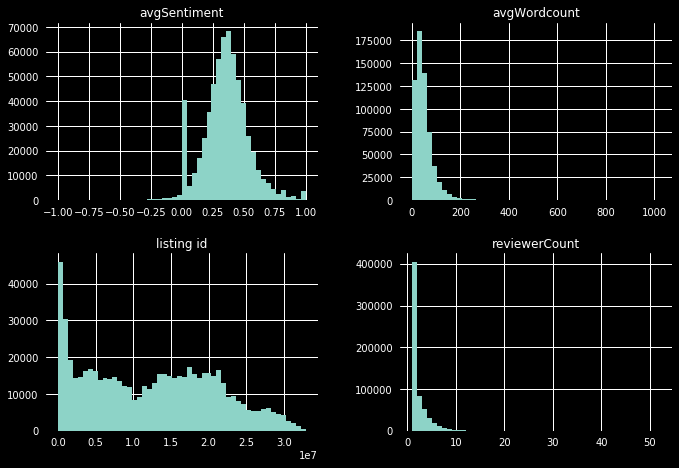

In [363]:
reviews.hist(bins = 50, figsize= (10,7))
#plt.grid(False)
plt.show()

Arguably the simplest visualisation of a single column is the histogram - group the data into bins and plot the number in each bin. Plotted this way, it is clear that most reviews are positive, though not overwhelmingly so:

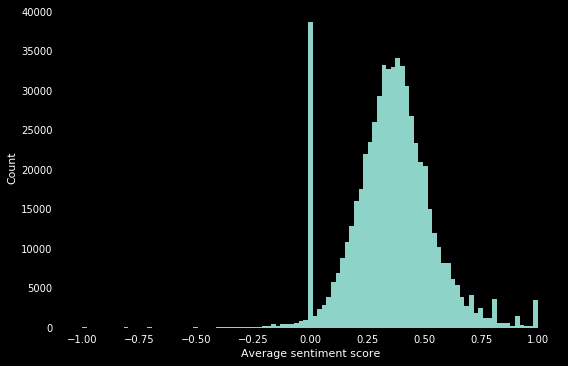

In [193]:
reviews['avgSentiment'].hist(bins = np.linspace(-1, 1, 100))
plt.xlabel('Average sentiment score')
plt.ylabel('Count')
plt.grid(False)
plt.show()

Most reviews tend to be pretty short too, around 40 words long:

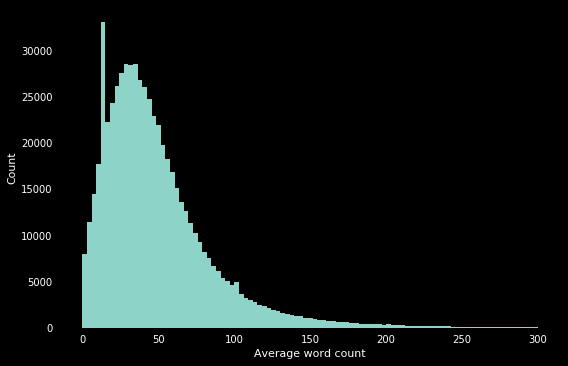

In [192]:
reviews['avgWordcount'].hist(bins = np.linspace(0, 300, 100))
plt.xlabel('Average word count')
plt.ylabel('Count')
plt.grid(False)
plt.show()

For now let's just take the median sentiment for each listing, so that the following table is *uniquely keyed* on the `listing id`, i.e. there is only one value for each `listing id`.

In [121]:
med_rvw = reviews.groupby('listing id')['avgSentiment'].median().reset_index()
med_rvw.head()

,listing id,avgSentiment
0,9554,0.376970
1,11076,0.727500
2,11417,0.272692
3,13913,0.337118
4,15400,0.394443


In this form, we are able to merge the `med_rvw` table onto the `listings` table. Merging is where we take two tables - a `left` and a `right`, and attach the `right` table onto the `left` table.

To match up the rows in the attached tables, pandas needs to know how to indentify each row - in this case we can use the id of each airbnb listing. This column is called `listing id` in `med_rvw`, and `id` in listings.

In the following cell, we extract the columns from `listings` we are interested in, and then call the `merge()` method. In this case, `left` is `listings` and `right` is `med_rvw`.

In [153]:
cols_to_keep = ['id','review rating','review accuracy', 'review cleanliness', 'review checkin',
                'review communication', 'review location', 'review value', 'neighbourhood']

merged = listings[cols_to_keep].merge(med_rvw, left_on = 'id', right_on = 'listing id', how = 'inner')
merged.head()

,id,review rating,review accuracy,review cleanliness,review checkin,review communication,review location,review value,neighbourhood,listing id,avgSentiment
0,9554,97.0,10.0,9.0,10.0,10.0,9.0,10.0,Haringey,9554,0.376970
1,11076,90.0,8.0,9.0,10.0,9.0,9.0,9.0,Ealing,11076,0.727500
2,11417,95.0,10.0,10.0,10.0,10.0,10.0,9.0,Tower Hamlets,11417,0.272692
3,13913,95.0,9.0,10.0,9.0,10.0,9.0,9.0,Islington,13913,0.337118
4,15400,95.0,10.0,10.0,10.0,10.0,10.0,9.0,Kensington and Chelsea,15400,0.394443


Now everything is matched up in one table, we can do fun things like look at the relationship between the actual review rating, and the sentiment of the review text:

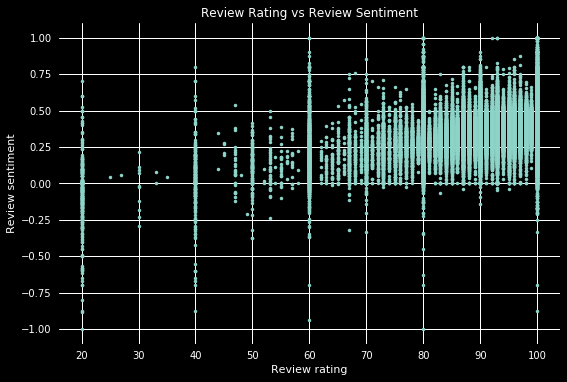

In [189]:
x = merged['review rating']
y = merged['avgSentiment']
# Drop pairs of (x, y) if either is NaN
x, y = list(zip(*[(x[i], y[i]) for i in range(len(x)) if np.isfinite(x[i]) and np.isfinite(y[i])]))

plt.plot(x, y, '.')
plt.title("Review Rating vs Review Sentiment")
plt.xlabel('Review rating')
plt.ylabel('Review sentiment')
plt.show()

As there are lots of points and they all overlap, often a better way of plotting dense data is to create a 2D histogram and plot the density of points. In this way we see better the overrepresentation of review ratings at 20 / 40 / 60 / 80 / 100%, and review sentiments of zero.

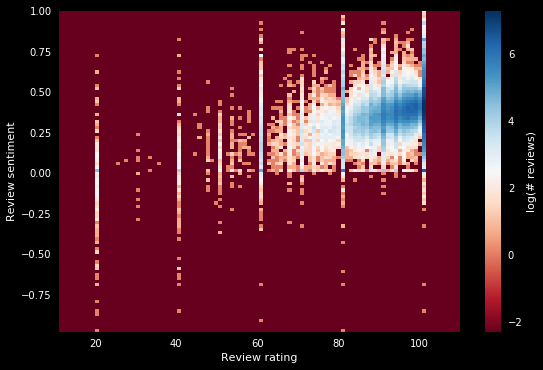

In [190]:
xbins = np.linspace(10, 110, 100)
ybins = np.linspace(-1, 1, 100)
hist2d, xe, ye = np.histogram2d(x,y, bins=(xbins, ybins))
plt.pcolormesh(xe[1:], ye[1:], np.log(hist2d.T + 0.1),cmap=plt.get_cmap('RdBu')) # Offset to avoid log(0)
plt.xlabel('Review rating')
plt.ylabel('Review sentiment')
plt.colorbar(label='log(# reviews)')
plt.show()

## Challenge: Which borough has the highest average location score? Lowest?

In [169]:
# Solution here..
merged.head()

,id,review rating,review accuracy,review cleanliness,review checkin,review communication,review location,review value,neighbourhood,listing id,avgSentiment
0,9554,97.0,10.0,9.0,10.0,10.0,9.0,10.0,Haringey,9554,0.376970
1,11076,90.0,8.0,9.0,10.0,9.0,9.0,9.0,Ealing,11076,0.727500
2,11417,95.0,10.0,10.0,10.0,10.0,10.0,9.0,Tower Hamlets,11417,0.272692
3,13913,95.0,9.0,10.0,9.0,10.0,9.0,9.0,Islington,13913,0.337118
4,15400,95.0,10.0,10.0,10.0,10.0,10.0,9.0,Kensington and Chelsea,15400,0.394443


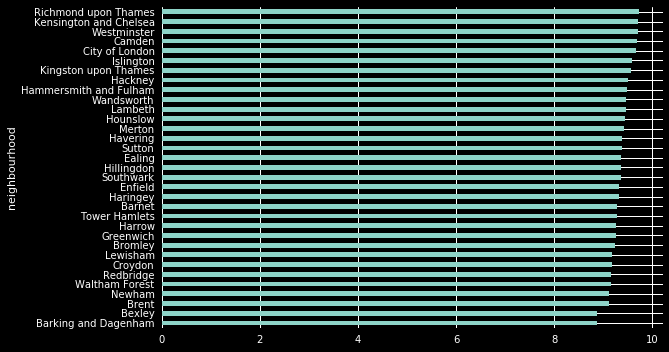

In [274]:
merged.groupby('neighbourhood')['review location'].mean().sort_values(ascending= True).plot('barh')

In [299]:
merged.pivot_table(index = ['neighbourhood'], values =['review location'], aggfunc = [np.median ,np.mean, len] )


,median,mean,len
,review location,review location,review location
neighbourhood,,,
Barking and Dagenham,9.0,8.867725,203.0
Barnet,10.0,9.289759,1253.0
Bexley,9.0,8.873563,186.0
Brent,9.0,9.116246,2217.0
Bromley,10.0,9.243852,504.0
Camden,10.0,9.688172,5624.0
City of London,10.0,9.675294,436.0
Croydon,9.0,9.184874,878.0


## Challenge: Does housing price correlate with airbnb price? popularity?

In [24]:
# Solution here...

In [366]:
calendar.head()

,listing id,mon_yr,days available,meanPrice,maxPrice,minPrice
0,9554,01-2019,31,36.03,39.0,35.0
1,9554,02-2019,28,36.14,39.0,35.0
2,9554,03-2019,31,36.29,39.0,35.0
3,9554,04-2018,0,NaN,NaN,NaN
4,9554,04-2019,7,36.14,39.0,35.0


In [367]:
calendar['id'] = calendar['listing id']

In [374]:
calendar =calendar.drop(columns=['listing id'] )
calendar = calendar.set_index('id')

In [ ]:
merger = pd.merge(calendar, listings, on= 'id')

In [390]:
merger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853374 entries, 0 to 1853373
Data columns (total 41 columns):
id                          int64
mon_yr                      object
days available              int64
meanPrice                   float64
maxPrice                    float64
minPrice                    float64
last scraped                datetime64[ns]
listing url                 object
name                        object
host id                     int64
experiences                 object
neighbourhood               object
latitude                    float64
longitude                   float64
property type               object
room type                   object
accommodates                int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed type                    object
minNights                   int64
maxNights                   int64
reviewCount                 int64
instant bookable            object
is 

In [398]:
merger.isnull().sum() / len(merger) * 100 

id                           0.000000
mon_yr                       0.000000
days available               0.000000
meanPrice                   24.816686
maxPrice                    24.816686
minPrice                    24.816686
last scraped                 0.000000
listing url                  0.000000
name                         0.042085
host id                      0.000000
experiences                  0.000000
neighbourhood                0.000000
latitude                     0.000000
longitude                    0.000000
property type                0.000000
room type                    0.000000
accommodates                 0.000000
bathrooms                    0.236164
bedrooms                     0.059351
beds                         0.174439
bed type                     0.000000
minNights                    0.000000
maxNights                    0.000000
reviewCount                  0.000000
instant bookable             0.000000
is business travel ready     0.000000
cancellation